In [1]:
import numpy as np
from IPython.display import Image, display
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist
from PIL import Image
import math
import scipy as sp

In [2]:
#Question 2 in Problem Set
img_noise = 'C:\\Users\\avons\\Downloads\\PS1\\PS1\\lenaNoise.png'
img_to_work = imread(img_noise)
img_to_work
imdim = Image.open(img_noise)
imdim_width = imdim.width
imdim_height = imdim.height
print("width: " + str(imdim_width) + " height: " + str(imdim_height))

width: 512 height: 512


<ipython-input-3-86d64046a6f4>:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  grayscale_img = rgb2gray(img_to_work)


Text(0.5, 1.0, 'Original Lena')

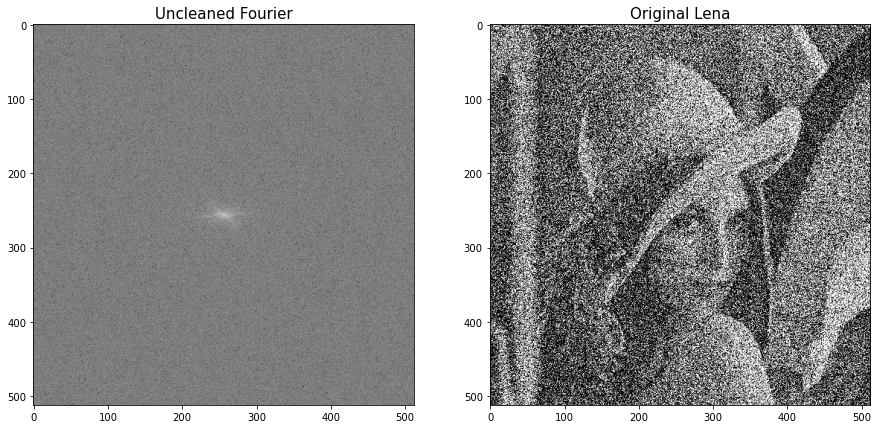

In [3]:
grayscale_img = rgb2gray(img_to_work)
lena_transform = np.fft.fft2(grayscale_img) 
lena_fourier = np.fft.fftshift(lena_transform)
fig, ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(np.log(abs(lena_fourier)),cmap='gray')
ax[0].set_title("Uncleaned Fourier", fontsize=15)
ax[1].imshow(abs(np.fft.ifft2(lena_fourier)),cmap='gray')
ax[1].set_title("Original Lena", fontsize=15)
#plt.imshow(grayscale_img,cmap='gray')
#np.fft.fft2(Image(img_noise))

Text(0.5, 1.0, 'Transformed Lena - 10^2')

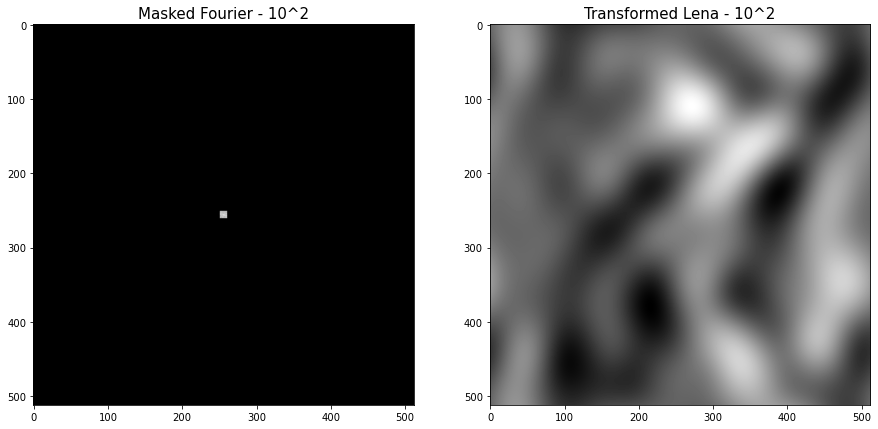

In [4]:
lena_transform = np.fft.fft2(grayscale_img) 
lena_fourier = np.fft.fftshift(lena_transform)
#plt.imshow(np.log(abs(lena_fourier)),cmap='gray')
lena_fourier[:251,0:512] = 1
lena_fourier[:512,0:251] = 1
lena_fourier[:512,261:] = 1
lena_fourier[261:,0:512] = 1
fig, ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(np.log(abs(lena_fourier)),cmap='gray')
ax[0].set_title("Masked Fourier - 10^2", fontsize=15)
ax[1].imshow(abs(np.fft.ifft2(lena_fourier)),cmap='gray')
ax[1].set_title("Transformed Lena - 10^2", fontsize=15)

Text(0.5, 1.0, 'Transformed Lena - 20^2')

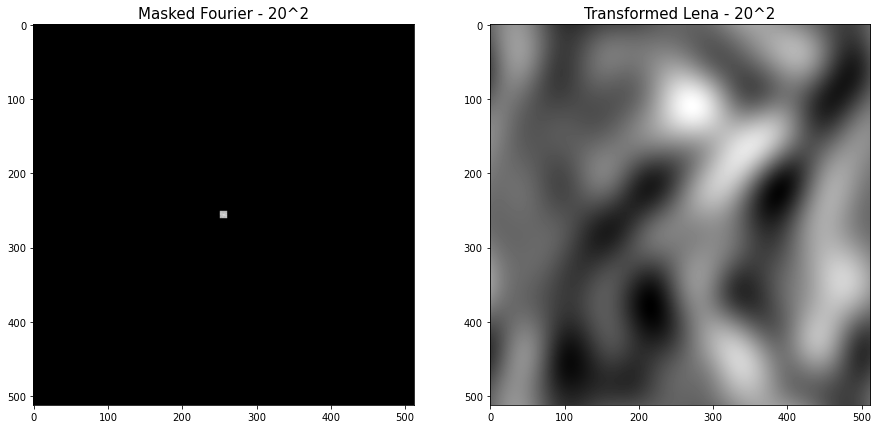

In [5]:
lena_fourier[:246,0:512] = 1
lena_fourier[:512,0:246] = 1
lena_fourier[:512,266:] = 1
lena_fourier[266:,0:512] = 1
#plt.imshow(np.log(abs(lena_fourier)),cmap='gray')
#plt.imshow(abs(np.fft.ifft2(lena_fourier)),cmap='gray')
fig, ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(np.log(abs(lena_fourier)),cmap='gray')
ax[0].set_title("Masked Fourier - 20^2", fontsize=15)
ax[1].imshow(abs(np.fft.ifft2(lena_fourier)),cmap='gray')
ax[1].set_title("Transformed Lena - 20^2", fontsize=15)

Text(0.5, 1.0, 'Transformed Lena - 30^2')

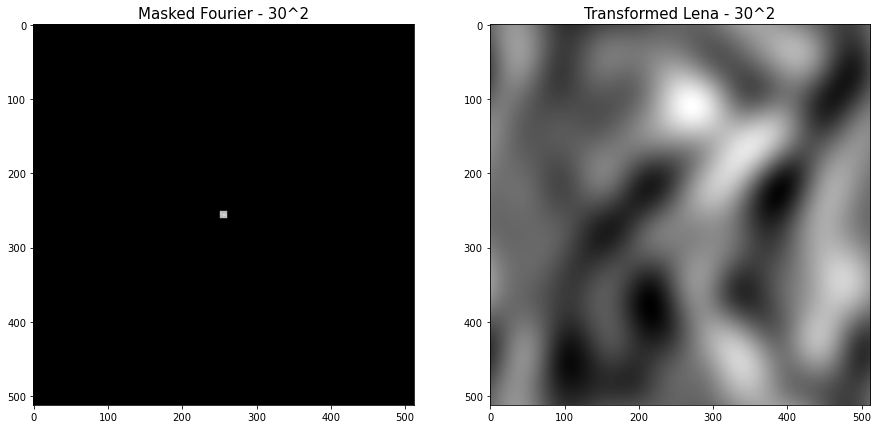

In [6]:
lena_fourier[:241,0:512] = 1
lena_fourier[:512,0:241] = 1
lena_fourier[:512,271:] = 1
lena_fourier[271:,0:512] = 1
#plt.imshow(np.log(abs(lena_fourier)),cmap='gray')
#plt.imshow(abs(np.fft.ifft2(lena_fourier)),cmap='gray')
fig, ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(np.log(abs(lena_fourier)),cmap='gray')
ax[0].set_title("Masked Fourier - 30^2", fontsize=15)
ax[1].imshow(abs(np.fft.ifft2(lena_fourier)),cmap='gray')
ax[1].set_title("Transformed Lena - 30^2", fontsize=15)

In [7]:
#Question 3: Implementation of Gradient Descent Algorithm for ROF Model with total variation minimization

In [8]:
#Basically, clean up the image using gradient descent, which is done through total variation minimization

In [21]:
rate = 0.01 # Learning rate
precision = 0.000001 #This tells us when to stop the algorithm
#previous_step_size = 1 #
max_iters = 10000 # maximum number of iterations
 #iteration counter
 #Gradient of our function 

def Gradient_Descent(curr,rate):
    #f = np.zeros((512, 512, 3), dtype=np.uint8)
    #f[:,:] = rate
    #f = Image.fromarray(f)
    #clr_img = rgb2gray(f)
    a = np.arange(262144).reshape(512,512)
    #a = np.full((512, 512, 3), rate, dtype=np.uint8)
    #image = Image.fromarray(a, "RGB")
    #image.save("white.png", "PNG")
    #clr_img = rgb2gray(image)
    prev_steps = 1
    iters = 0
    while prev_steps > precision and iters < max_iters:
        prev_x = curr #Store current x value in prev_x
        func = (2 * rate * (curr - a)) - (np.gradient(prev_x)/np.linalg.norm(prev_x, ord=1))
        print(str(sp.integrate.simps(func)))
        curr = curr - sp.integrate.simps(func) #Grad descent
        #f is the noisy image, so what is u
        prev_steps = abs(curr - prev_x) #Change in x
        iters = iters+1 #iteration count
        print("Iteration",iters,"\nX value is",curr) #Print iterations
    plt.imshow(abs(np.fft.ifft2(curr)),cmap='gray')

y = Gradient_Descent(lena_fourier,0.05)


[[-1.30049500e+04+0.j -3.91681500e+04+0.j -6.53313500e+04+0.j ...
  -1.33300738e+07+0.j -1.33562369e+07+0.j -1.33824002e+07+0.j]
 [-1.30049500e+04+0.j -3.91681500e+04+0.j -6.53313500e+04+0.j ...
  -1.33300738e+07+0.j -1.33562369e+07+0.j -1.33824002e+07+0.j]]


ValueError: operands could not be broadcast together with shapes (512,512) (2,512) 